In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'come',
    'away',
    'spin'
]

data = np.concatenate([
    np.load('/content/drive/MyDrive/lstm_data/seq_come_1699963190.npy'),
    np.load('/content/drive/MyDrive/lstm_data/seq_away_1699963190.npy'),
    np.load('/content/drive/MyDrive/lstm_data/seq_spin_1699963190.npy')
], axis=0)

data.shape

(2052, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2052, 30, 99)
(2052,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2052, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1846, 30, 99) (1846, 3)
(206, 30, 99) (206, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44163 (172.51 KB)
Trainable params: 44163 (172.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
57/58 [============================>.] - ETA: 0s - loss: 31.6392 - acc: 0.3509
Epoch 1: val_acc improved from -inf to 0.43204, saving model to models/model.h5
58/58 [==============================] - 3s 24ms/step - loss: 31.8228 - acc: 0.3505 - val_loss: 35.0814 - val_acc: 0.4320 - lr: 0.0010
Epoch 2/200
 3/58 [>.............................] - ETA: 1s - loss: 43.6555 - acc: 0.4479

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 35.3710 - acc: 0.3635
Epoch 2: val_acc did not improve from 0.43204
58/58 [==============================] - 2s 27ms/step - loss: 35.2740 - acc: 0.3640 - val_loss: 19.2636 - val_acc: 0.3932 - lr: 0.0010
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 49.2029 - acc: 0.3700
Epoch 3: val_acc did not improve from 0.43204
58/58 [==============================] - 2s 27ms/step - loss: 49.2029 - acc: 0.3700 - val_loss: 91.8962 - val_acc: 0.3786 - lr: 0.0010
Epoch 4/200
56/58 [===========================>..] - ETA: 0s - loss: 49.1788 - acc: 0.3633
Epoch 4: val_acc did not improve from 0.43204
58/58 [==============================] - 2s 28ms/step - loss: 48.2536 - acc: 0.3657 - val_loss: 16.0005 - val_acc: 0.4078 - lr: 0.0010
Epoch 5/200
57/58 [============================>.] - ETA: 0s - loss: 9.2740 - acc: 0.3821
Epoch 5: val_acc did not improve from 0.43204
58/58 [==============================] - 2s 30ms/step - loss

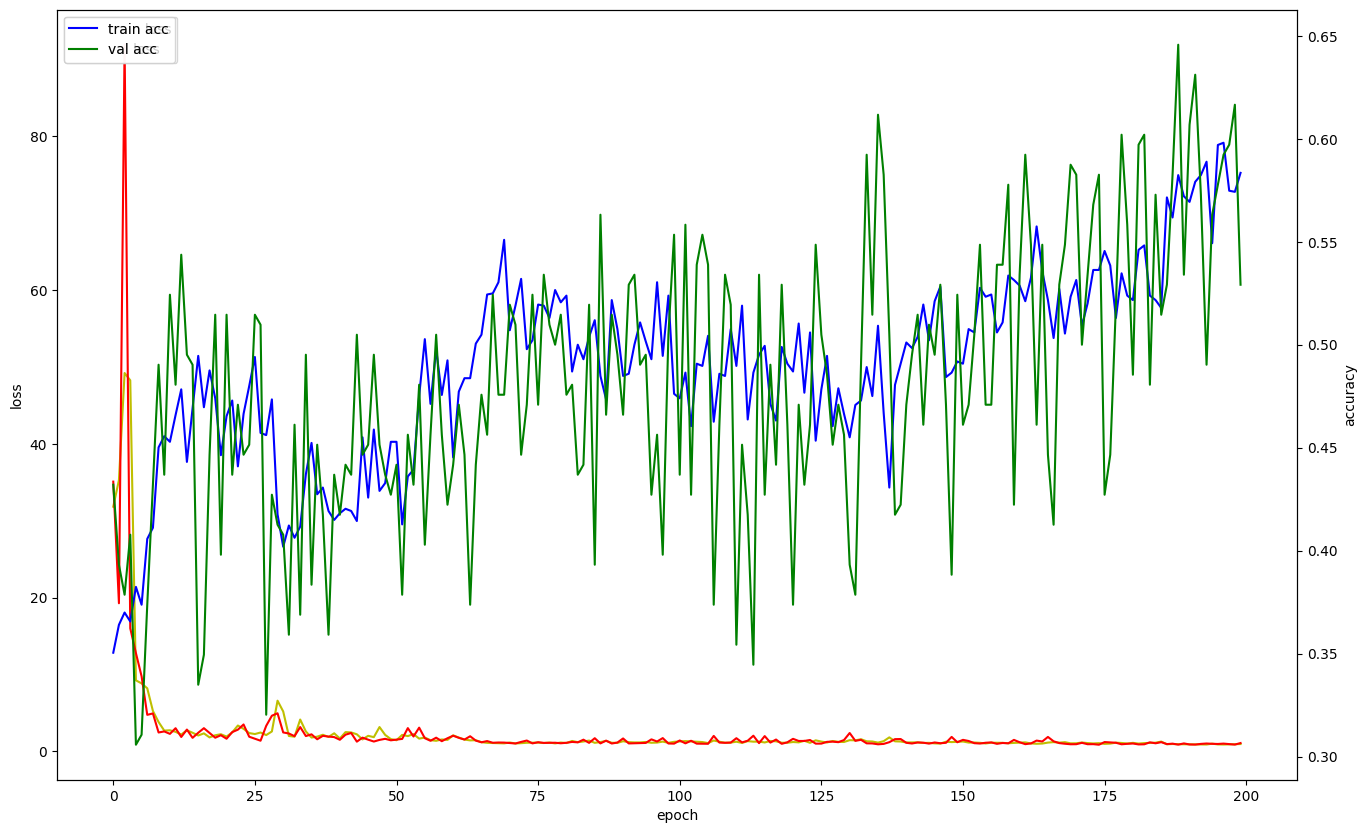

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()